<a href="https://colab.research.google.com/github/tetresbr/RemuneracaoEstadoSP/blob/main/Salarios_Estado_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analise sobre Cargos e Salarios da PMESP**

In [1]:
import pandas as pd

Dados coletados do site de transparencia do Estado de São Paulo

http://www.transparencia.sp.gov.br/buscaRemunera.html

Arquivo Servidores Ativos

In [55]:
salarios = pd.read_csv("RemuneracaoAtivos.csv", sep=';')
salarios = salarios.drop('NOME', 1)
salarios.head()

,CARGO,ORGÃO,SITUAÇÃO,REMUNERAÇÃO DO MÊS,FÉRIAS E 13º SALÁRIO,PAGAMENTOS EVENTUAIS,LICENÇA PRÊMIO INDENIZADA,ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,REDUTOR SALARIAL,TOTAL LIQUÍDO (R$)
0,OFICIAL ADMINISTRATIVO,DETRAN,ATIVOS,"2601,32","0,00","0,00","0,00","114,40","0,00","1260,45"
1,SD 1C PM,PM,ATIVOS,"3667,57","1461,85","0,00","0,00","872,70","0,00","4058,90"
2,CAP PM,PM,ATIVOS,"10568,74","0,00","0,00","0,00","319,99","0,00","5767,27"
3,SD 1C PM,PM,ATIVOS,"3813,75","1271,25","0,00","0,00","523,62","0,00","4785,89"
4,2TEN PM,PM,ATIVOS,"7058,13","0,00","0,00","0,00","494,53","0,00","5095,23"


## **1 - Quantos Policiais Militares existem atualmente**

1.1 - Tratando os Dados

In [46]:
pms = salarios.ORGÃO == 'PM'

In [59]:
salarios_pm = salarios[pms]
salarios_pm.head(10)

,CARGO,ORGÃO,SITUAÇÃO,REMUNERAÇÃO DO MÊS,FÉRIAS E 13º SALÁRIO,PAGAMENTOS EVENTUAIS,LICENÇA PRÊMIO INDENIZADA,ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,REDUTOR SALARIAL,TOTAL LIQUÍDO (R$)
1,SD 1C PM,PM,ATIVOS,"3667,57","1461,85","0,00","0,00","872,70","0,00","4058,90"
2,CAP PM,PM,ATIVOS,"10568,74","0,00","0,00","0,00","319,99","0,00","5767,27"
3,SD 1C PM,PM,ATIVOS,"3813,75","1271,25","0,00","0,00","523,62","0,00","4785,89"
4,2TEN PM,PM,ATIVOS,"7058,13","0,00","0,00","0,00","494,53","0,00","5095,23"
5,CABO PM,PM,ATIVOS,"4378,56","0,00","0,00","0,00","290,90","0,00","3678,87"
7,CABO PM,PM,ATIVOS,"5139,44","1848,71","0,00","0,00","698,16","0,00","4882,43"
14,SD 2C PM,PM,ATIVOS,"2574,66","0,00","1630,62","0,00","0,00","0,00","3439,83"
15,CABO PM,PM,ATIVOS,"4156,96","0,00","0,00","0,00","698,16","0,00","3248,06"
20,CABO PM,PM,ATIVOS,"5542,60","0,00","0,00","0,00","407,26","0,00","2673,90"
21,CABO PM,PM,ATIVOS,"4354,91","0,00","0,00","0,00","698,16","0,00","4022,76"


1.2 - Resultado

In [49]:
salarios_pm.CARGO.count()

83215

Chegamos a conclusão que atualmente existem **83.215** Policiais Militares na **Ativa**.

## **2 - Qual o cargo que mais tem policiais na ativa**

In [50]:
salarios_pm['CARGO'].value_counts()

CABO  PM    36824
SD 1C PM    20202
SD 2C PM     9821
1SGT  PM     4770
2SGT  PM     3501
1TEN  PM     2034
CAP   PM     1684
3SGT  PM     1416
STEN  PM     1371
MAJ   PM      528
TCEL  PM      280
2TEN  PM      237
3CFO  PM      177
2CFO  PM      177
1CFO  PM      115
CEL   PM       73
ASPOF PM        2
PROF PM         2
CMT  GER        1
Name: CARGO, dtype: int64

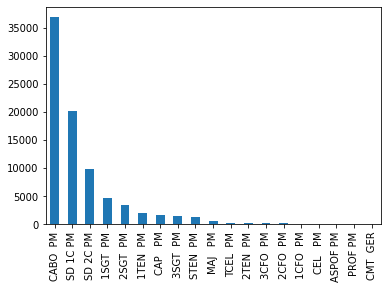

In [51]:
salarios_pm['CARGO'].value_counts().plot(kind='bar')

Podemos chegar a conclusão que o cargo com mais policiais na ativa é o de Cabo.

Dado interessante, já que o militarismo deveria seguir um esquema de piramide, onde a base, que no caso deveriam ser **Soldados**, deveria ser maior, seguido por **Cabos**, 3SGT, 2SGT, 1SGT e STEN.

## **3 - Qual o cargo com menos policiais na ativa**

In [52]:
salarios_pm['CARGO'].value_counts()

CABO  PM    36824
SD 1C PM    20202
SD 2C PM     9821
1SGT  PM     4770
2SGT  PM     3501
1TEN  PM     2034
CAP   PM     1684
3SGT  PM     1416
STEN  PM     1371
MAJ   PM      528
TCEL  PM      280
2TEN  PM      237
3CFO  PM      177
2CFO  PM      177
1CFO  PM      115
CEL   PM       73
ASPOF PM        2
PROF PM         2
CMT  GER        1
Name: CARGO, dtype: int64

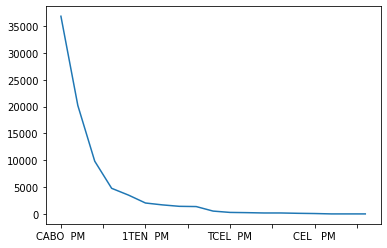

In [53]:
salarios_pm['CARGO'].value_counts().plot()

Conseguimos verificar que o cargo com menos pessoas seria o CMT Geral, porém não poderiamos levar em consideração esse dado, visto que pode existir apenas 1 CMT Geral.

Neste caso podemos levar em conta os cargos, Prof PM que tem apenas 2 ativos.

Temos tambem o caso de Aspirante a Oficial, onde existem apenas 2, no caso pode ser por não ter sido formada a nova turma da Academia do Barro Branco.

Chegamos ao cargo de CEL, que possui apenas 73 policiais na ativa.

## **4 - Orçamento com Remuneração Mensal (Sem contar Férias, 13º, Licença Premio, Abonos, Permanencia e Indenizações)**

In [56]:
salarios_pm['REMUNERAÇÃO DO MÊS'].sum()

'3667,5710568,743813,757058,134378,565139,442574,664156,965542,604354,915321,894546,442574,663813,752574,664513,245542,605773,545369,022574,663667,573813,753900,297571,254441,287902,444280,523667,575211,406312,0617110,014983,463813,755773,544959,494611,285369,024119,764890,823318,534820,354552,868036,585452,225251,023318,534552,863813,754977,352574,662574,664365,733318,534714,853667,575424,935542,603959,014016,693488,533667,573667,573667,573318,532574,666350,352574,664820,355399,894119,766357,0010377,254658,104119,762574,668917,293318,534552,864280,524820,354192,664959,493848,453318,535050,645542,605837,603318,534156,962574,664552,864046,474280,524046,474133,016150,384280,525542,606214,244511,913551,254280,525296,615542,604511,914280,525452,224552,863667,573667,576312,064441,284046,473813,752574,664249,414441,288738,787077,405833,015773,546336,114119,767055,536240,764352,485556,585542,603813,754280,525556,585542,605542,603318,534279,194552,864441,2811124,283813,755369,025483,743069,884